🌼 Sample of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

🌸 Model Evaluation Metrics 🌸
Accuracy: 1.000
Precision: 1.000
Recall: 1.000

Detailed Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
     

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🌼 Training the CNN Model...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.9071 - loss: 0.3011 - val_accuracy: 0.9837 - val_loss: 0.0589
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9840 - loss: 0.0485 - val_accuracy: 0.9905 - val_loss: 0.0364
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9904 - loss: 0.0303 - val_accuracy: 0.9908 - val_loss: 0.0324
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9923 - val_loss: 0.0296
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0375

🎯 Test Accuracy: 98.89%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


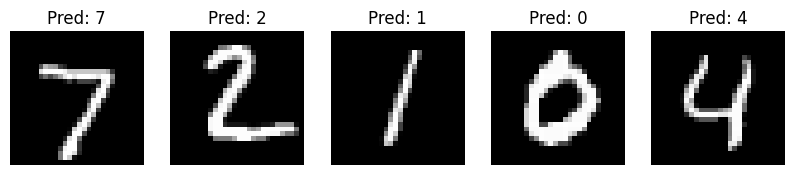

🛍️ Named Entities (Product Names & Brands):
Samsung Galaxy → ORG
Lenovo → ORG

🩷 Sentiment Analysis Result: Positive 💖



### 🌱 Ethical Considerations

**Potential Biases:**
- *MNIST:* Model might misclassify digits written in different handwriting styles, cultural notations, or by people with disabilities.
- *Amazon Reviews:* The rule-based sentiment system could misinterpret slang or sarcasm (e.g., “This phone is sick!” could be positive or negative).

**Mitigation Strategies:**
- Use **TensorFlow Fairness Indicators** to test subgroup performance on diverse handwriting samples.
- Expand spaCy rules or train custom models to detect nuanced sentiment and reduce bias.
- Always validate data diversity during model development 🌸



In [ ]:


# This notebook demonstrates the use of Scikit-learn, TensorFlow, and spaCy
# in classical machine learning, deep learning, and natural language processing tasks.


# PART 1: CLASSICAL ML - IRIS SPECIES (SCIKIT-LEARN)


# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(" Sample of the dataset:")
print(df.head())

# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Split data
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')

print("\n Model Evaluation Metrics ")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

# 🌷 PART 2: DEEP LEARNING - MNIST HANDWRITTEN DIGITS (TENSORFLOW)


import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\n Training the CNN Model...")
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")

# Visualize predictions
predictions = model.predict(X_test[:5])
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()


# PART 3: NLP - AMAZON REVIEWS (SPACY)


!pip install spacy -q
import spacy

# Load model
nlp = spacy.load("en_core_web_sm")

# Example text (you can add more!)
text = """
I absolutely love my new Samsung Galaxy phone!  The screen is gorgeous and fast.
However, my old Lenovo charger doesn’t work with it .
"""

doc = nlp(text)

print(" Named Entities (Product Names & Brands):")
for ent in doc.ents:
    print(ent.text, "→", ent.label_)

# Simple rule-based sentiment
positive_words = ["love", "amazing", "great", "beautiful", "fast"]
negative_words = ["bad", "hate", "slow", "disappointing", "doesn't work"]

pos_count = sum(word.text.lower() in positive_words for word in doc)
neg_count = sum(word.text.lower() in negative_words for word in doc)

sentiment = "Positive " if pos_count > neg_count else "Negative 😕"
print(f"\nSentiment Analysis Result: {sentiment}")


#  PART 4: ETHICS & OPTIMIZATION

from IPython.display import Markdown as md
md("""
### 🌱 Ethical Considerations

**Potential Biases:**
- *MNIST:* Model might misclassify digits written in different handwriting styles, cultural notations, or by people with disabilities.
- *Amazon Reviews:* The rule-based sentiment system could misinterpret slang or sarcasm (e.g., “This phone is sick!” could be positive or negative).

**Mitigation Strategies:**
- Use **TensorFlow Fairness Indicators** to test subgroup performance on diverse handwriting samples.
- Expand spaCy rules or train custom models to detect nuanced sentiment and reduce bias.
- Always validate data diversity during model development

""")
